## Разведовательный анализ данных. Проверка статистических гипотез.

### Разведовательный анализ данных  
**Разведовательный анализ данных (Exploratory Data Analysis, EDA)** – это процесс анализа наборов данных для обобщения их основных характеристик, поиска трендов и взаимосвязей. Для разведовательного анализа данных используют следующие инструменты и методы:
1. Описательная статистика — метод, который позволяет описать основные характеристики выборки данных. Описательная статистика включает в себя различные показатели, такие как среднее значение, медиана, дисперсия, стандартное отклонение, минимум, максимум, квартили и другие.
2. Визуализация данных, которая включает в себя создание графиков и диаграмм. Она помогает лучше понять распределения, корреляции и тренды, например, гистограммы, диаграммы рассеяния, ящики с усами.
3. Исследование связей, которое показывает влияние одних факторов на другие (например, высота и вес людей взаимосвязаны, т.е. при увеличении роста вес человека также увеличивается). Для исследования взаимосвязей расчитывают **коэффициент корреляции** - это показатель, характеризующий силу статистической связи между двумя или несколькими случайными величинами. Значения коэффициента корреляции всегда расположены в диапазоне от -1 до 1, где 1 - сильная положительная корреляция (например, чем выше температура, тем больше мороженного продается), а -1 - сильная отрицательная корреляция (например, чем выше уровень образования, тем меньше уровень преступности). Промежуточные значения, близкие к 0, будут указывать на слабую корреляцию между переменными и, соответственно, низкую зависимость. Визуальное отображение взаимосвязей переменных: 

[![corr1.png](https://i.postimg.cc/j2DJjbFZ/corr1.png)](https://postimg.cc/wRdBWSHm)

Пример проведения разведовательного анализа: представим, что у нас есть набор данных о продажах товаров в магазине. При проведении разведовательного анализа данных мы можем изучить, какие товары самые популярные, как цены на них изменяются, каковы средние продажи в разное время года и как коррелируют различные факторы (например, цена и количество продаж). В результате анализа мы можем выявить, например, что определенные товары продаются лучше в определенное время года или что цена оказывает значительное влияние на объем продаж.  
Разберем пример проведения разведовательного анализа по данным о поездках на такси:

In [1]:
import pandas as pd # Импортируем библиотеку для работы с датасетом
import seaborn as sns # Импортируем библиотеки для работы с визуализацией
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid") # Устанавливаем тему для графиков
sns.set_palette(sns.color_palette("icefire")) # Устанавливаем единую палитру для всех визуализаций
df = sns.load_dataset("taxis") # Загружаем датасет о поездках на такси
df.head() # Проверяем загрузку

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**Показатели**  
pickup - Время посадки  
dropoff - Время высадки  
passengers - К-во пассажиров  
distance - Дистанция  
fare - Оплата за проезд  
tip - Чаевые  
tolls  - Пошлина
total - Итоговая сумма поездки  
color - Цвет машины  
payment - Вид оплаты  
pickup_zone - Зона посадки  
dropoff_zone - Зона высадки   
pickup_borough - Район посадки  
dropoff_borough - Район высадки

In [2]:
df.select_dtypes(include=['object']).describe() # Описательная статистика для категориальных данных
# df.select_dtypes() обращается к переменным определенного типа
# Метод .describe() выводит описательную статистику по каждой переменной

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [3]:
df.select_dtypes(include=['float64', 'int64']).describe() # Описательная статистика для числовых данных

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [4]:
df.dtypes # Типы данных датафрейма можно посмотреть при помощи команды .dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
# Визуализация данных в разведовательном анализе данных начинается с построения распределения при помощи гистограмм
# Гиистограмма -  визуальный элемент показывающий, с какой частотой один и тот же параметр принимает определенные значения.
# Рассмотрим построение на примере показателя payment (вид оплаты)
df['payment'].value_counts() # метод .value_counts() выводит частоту для кадого значения переменной

payment
credit card    4577
cash           1812
Name: count, dtype: int64

<Axes: xlabel='payment', ylabel='count'>

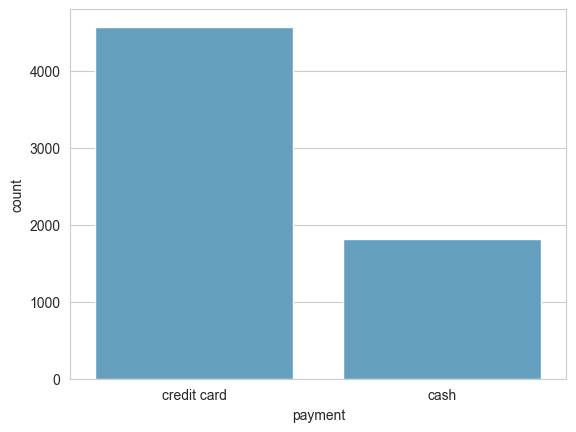

In [6]:
# Построение гистограммы
sns.countplot(df, x='payment')
# По данному графику можем сделать вывод, что кредитными картами пассажиры пользуются в 2 раза чаще

<Axes: xlabel='payment', ylabel='count'>

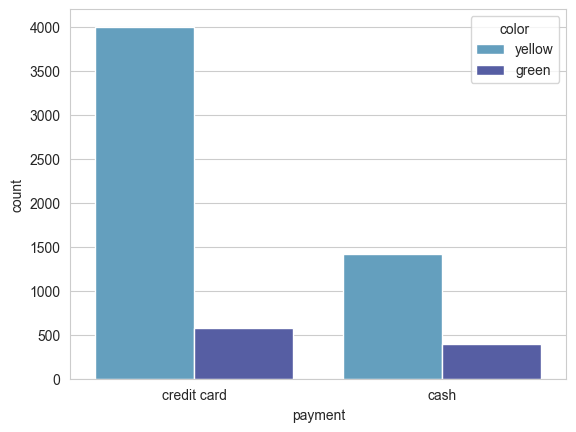

In [7]:
# Также при построении гистрограмм можно добавлять различные срезы в данных при помощи атрибута hue = <Переменная> 
sns.countplot(df, x='payment', hue = 'color')
# В данном случае можем сделать вывод, что чаще всего к пассажирам приезжает желтая машина и при окончании поездки они расплачиваются картой

<Axes: xlabel='total', ylabel='Count'>

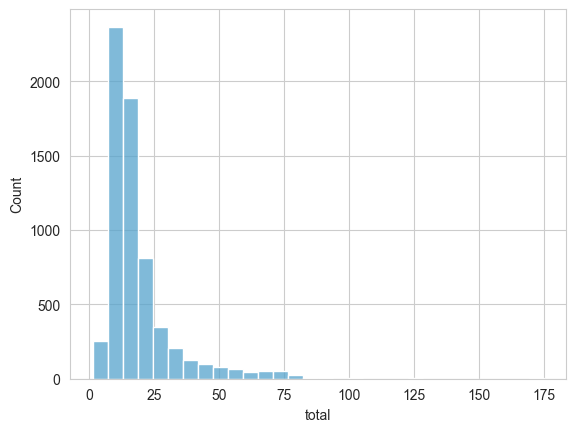

In [8]:
# Построим гистограмму для числовой переменной total, параметр bins задает число разбиений
sns.histplot(df, x='total', bins = 30)
# По данной диаграмме можем сделать вывод, что распределение ассиметричное, большинство заказов такси стоят до 25$ 
# Длинный хвост у распределения может указывать на наличие выбросов, либо поездку на большое расстояние

<Axes: >

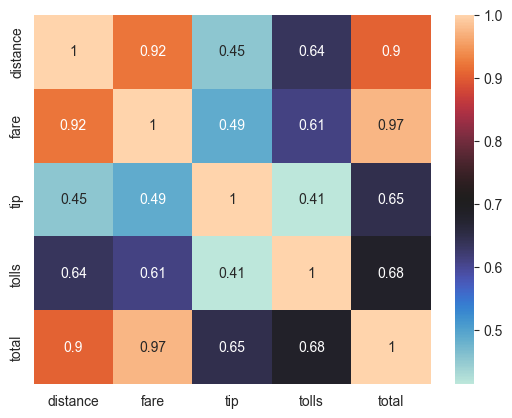

In [9]:
# Для исследования взаимосвязей рассмотрим визуализацию тепловой карты (heatmap)
# Данные для построения диаграммы - коэффициенты корреляции между переменными, вычисляется при помощи функции .corr()
# Параметры annot и cmap добавляют подписи и меняют цвет
sns.heatmap(df[['distance','fare','tip','tolls','total']].corr(), annot=True, cmap="icefire")
# По графику заметим, что обратной корреляции в данных не наблюдается
# Красный цвет означает сильную взаимосвязь, голубой - более слабую

<Axes: xlabel='fare', ylabel='distance'>

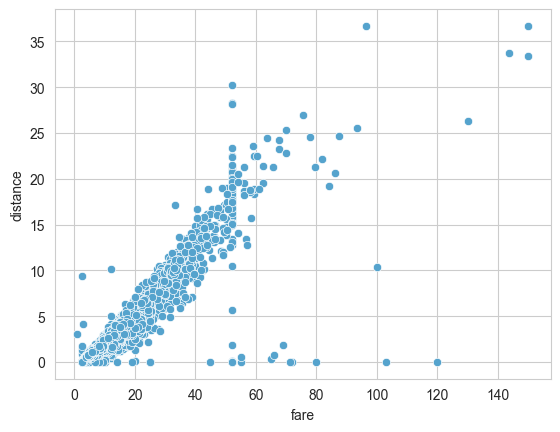

In [10]:
# Рассмотрим более детально взаимосвязь переменных fare (стоимость поездки) и distance (дистанция) (коэффициент корреляции составляет 0,97 - сильная корреляция)
# Для этого построим диаграмму рассеяния, где по шкале х - стоимость поездки, по у - дистанция
sns.scatterplot(df, x="fare", y="distance")
# График подтвержает взаимосвязь: чем больше дистанция поездки, тем выше ее стоимость

<Axes: xlabel='distance', ylabel='tip'>

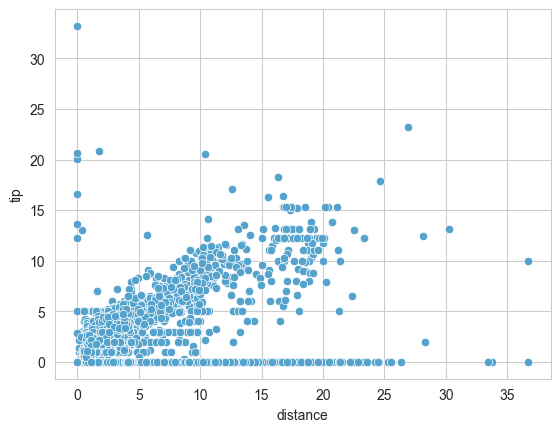

In [11]:
# Также рассмотрим взаимосвязь переменных tip (чаевые) и distance (дистанция) (коэффициент корреляции составляет 0,45 - средняя корреляция)
sns.scatterplot(df, x="distance", y="tip")
# По графику видно, что наблюдения располагаются более разрозненно, также присутсвует много нулевых значений

Также в рамках разведовательного анализа данных может возникнуть потребность в группировке данных по определенному признаку для их обобщения. Для этого используется функция `groupby`, которая разделяет датасет по заданным группам. Для обобщения используются функции агрегирования, которые принимают несколько отдельных значений и возвращают сводные данные (среднее, медиана, минимум, максимум).

In [12]:
# Например, рассмотрим медианное значение чаевых, оставляемых в такси разного цвета
# Для этого в параметр by функции groupby передаем столбец color, по которому будет происходить разделение на группы (желтые, зеленые)
# .median() задает агреггирующую функцию
df[['color','tip']].groupby(by= 'color').median()

,tip
color,
green,0.00
yellow,1.95


In [13]:
# Также в groupby можно передавать несколько столбцов
# Посмотрим, какая средняя стоимость поездки в топ-10 зонах и районах
# Функция sort_values сортирует значения, а параметр ascending задает направление сортировки
df[['pickup_borough','pickup_zone','total']].groupby(by= ['pickup_borough','pickup_zone' ]).mean().sort_values(by = 'total', ascending = False).head(10)

total
pickup_borough pickup_zone                            
Queens         East Flushing                 90.500000
               Flushing Meadows-Corona Park  75.560000
               JFK Airport                   55.336954
               Douglaston                    53.730000
               Maspeth                       52.040000
Bronx          Bronx Park                    50.330000
Queens         Cambria Heights               46.903333
Bronx          Crotona Park East             44.870000
Queens         Howard Beach                  44.800000
Brooklyn       Sunset Park West              43.086667

### Задание 1  
Построить гистограммы для оставшихся переменных, сделать выводы.    

### Задание 2  
При помощи группировки ответить на следующие вопросы: какая максимальная сумма поездки была оплачена кредитной картой и наличными? пассажиры из какого района платят больше всего чаевых? сколько суммарно проехали пассажиры с различных зон посадки?

### Проверка статистических гипотез

**Статистической гипотезой** называется любое утверждение о виде или свойствах распределения наблюдаемых в эксперименте случайных величин. Проверка статистической гипотезы состоит в том, чтобы сформулировать такое правило, которое позволило бы по результатам проведенных наблюдений принять или отклонить гипотезу. Правило, согласно которому гипотеза
принимается или отвергается, называется **критерием проверки статистической гипотезы**.  
  
Обычно статистические гипотезы делят на следующие виды:   
-однородности, если имеется две или более выборок случайных величин;  
-независимости, если имеется выборка многомерной случайной величины;   
-случайности, если есть предположения о независимости и одинаковом распределении наблюдений в выборке;   
-о виде распределения, если есть предположения о законе распределения случайной величины  

Гипотезу, которую мы проверяем, будем называется основной или нулевой гипотезой, и всегда обозначается H0. Альтернативные или конкурирующие гипотезы обозначаются H1, H2...
Например, мы хотим проверить существует ли связь между цветом такси и средней скоростью, в таком случае гипотезы будут сформулированы так:  
Н0: Средняя скорость такси не зависит от цвета машины   
Н1: Средняя скорость такси зависит от цвета машины    

На примере ниже видно, как распределение данных может выглядеть при разделении показателя на разные группы (в данном примере - разделение на желтые и зеленые машины).  

 [![2024-11-15-22-53-30.png](https://i.postimg.cc/Hnj6z6gd/2024-11-15-22-53-30.png)](https://postimg.cc/64JV5Lqm)
 
Рассмотрим проверку данной гипотезы на примере:  

In [14]:
df['time'] = df['dropoff'] - df['pickup'] # Расчет времени поездки
df['time'] = df['time'].dt.total_seconds()/60 # Перевод в минуты при помощи модуля dt и функции .total_seconds()
df['speed'] = df['distance']/df['time'] # Рассчитываем среднюю скорость как дистанция/время
df['speed'] = df['speed'].fillna(df['speed'].median()) # Заполняем пропущенные значения для работы статистических алгоритмов

In [15]:
df[['speed', 'color']].groupby(by='color').mean() # Посмотрим на значение средней скорости в группах
# Видим различие в 0,02 км/мин, по нему мы точно не можем сказать различаются ли группы в статистическом плане

,speed
color,
green,0.235323
yellow,0.215033


Мы проверяем гипотезу об однородности двух выборок случайной величины, т.е. в данном примере данные о скорости делятся на две группы: скорость желтых и зеленых машин. Для проверки гипотезы воспользуемся следующими методами:  
1. **Дисперсионный анализ (ANOVA)** — это статистический метод, который используется для сравнения средних значений двух или более выборок. Данный вид анализа делится на:  
- Однофакторный ANOVA  – это метод статистического анализа данных, который используется для определения наличия статистически значимых различий между двумя или более группами по одной независимой переменной.  
- Двухфакторный ANOVA – это метод статистического анализа данных, который позволяет определить наличие статистически значимых различий между группами по двум независимым переменным (факторам).  
- Многовариантный ANOVA — это статистический метод, который используется для анализа различий между группами (факторами) и влияния различных переменных (факторов) на исследуемую зависимую переменную. 
2. **T-тест** используется для сравнения средних значений двух групп данных. Он помогает определить, есть ли значимые различия между этими группами. T-test является одним из наиболее часто используемых статистических тестов в анализе данных.  

In [16]:
# Разделим данные на группы
group_yellow = df['speed'][df['color'] == 'yellow']
group_green = df['speed'][df['color'] == 'green']

In [17]:
from scipy.stats import f_oneway # Импорт функции для дисперсионного анализа (в даном примере используем однофакторный)
f_stat, p_value = f_oneway(group_yellow, group_green) # функция возвращает два значения: значение критерия Фишера и p-значение  
print(f"F-statistic: {f_stat}, P-value: {p_value}") # Вывод результата

F-statistic: 0.26660045643847763, P-value: 0.6056391384085202


**F-статистика (F-значение)** измеряет различия между группами, то есть отношение между средними значениями в группах и дисперсией внутри групп. Если F-значение большое, то это указывает на статистически значимые различия между группами (Проверяется па таблицам).  
**p-value (вероятность)** - это вероятность того, что различия между группами были случайными и не связаны с фактором, который изучается. Если p-value меньше выбранного уровня значимости (обычно 0,05), то можно отбросить нулевую гипотезу и утверждать, что между группами есть статистически значимые различия.

Мы получили следующий результат: `F-statistic: 0.26660045643847763, P-value: 0.6056391384085202`  
По значению p-value (0,6>0,05) можем сделать вывод о том, что нет оснований отклонять нулевую гипотезу, между группами не наблюдается различий

In [18]:
# Проверим гипотезу при помощи t-теста (для того чтобы получить значимые результаты обычно проводят от 2-х и более статистических тестов)
from scipy.stats import ttest_ind # Импорт функции для t-теста
t_stat, p_value = ttest_ind(group_yellow, group_green)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# p-value также оказалось выше уровня значимости, следовательно нет оснований отклонить нулевую гипотезу

T-statistic: -0.5163336677367438, P-value: 0.6056391384084638


Также существуют критерии для проверки категориальных данных, например, **Критерий хи-квадрат Пирсона** является статистическим методом, используемым для проверки гипотез о независимости двух категориальных переменных. Этот тест помогает определить, существует ли статистически значимая связь между переменными. 

In [19]:
# Проверим гипотезу при помощи критерия хи-квадрат 
df['speed_category'] = '' # Создаем категоризированную переменную для скорости
df.loc[df['speed']<= df['speed'].median(),'speed_category'] = 'Низкая' # Проводим разделение по медиане на низкую и высокую скорость
df.loc[df['speed']> df['speed'].median(),'speed_category']  = 'Высокая'

In [20]:
# Для проведения теста необходимо создать таблицу сопряженности
# Таблица сопряженности показывает частоты совместного появления категорий
pd.crosstab(df['speed_category'], df['color'])

color,green,yellow
speed_category,,
Высокая,576,2637
Низкая,406,2814


In [21]:
from scipy.stats import chi2_contingency # Импорт функции для хи-квадрат
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['speed_category'], df['color'])) # Функция принимает таблицу сопряженности
# и возвращает статистику хи-квадрат, p-значение, степени свободы (dof) и ожидаемые частоты
# число степеней свободы — это количество значений, используемых при расчете статистической характеристики, которые могут свободно изменяться
print(f"χ²: {chi2}, P-value: {p}")

χ²: 34.759572607836894, P-value: 3.730399329812915e-09


In [22]:
expected # Таблица ожидаемых частот

array([[ 490.46572361, 2722.53427639],
       [ 491.53427639, 2728.46572361]])

P-значение располагается близко к нулю, меньше уровня значимости (0,05), следовательно можем сделать следующий вывод: нет оснований принимать нулевую гипотезу, между группами существует различие.  
Следует отметить, что результаты данного теста не сопоставими с результатами дисперсионного анализа и т-теста, поскольку данные были категоризированны.

### Задание 1  
Проверить наличие статистических различий между следующими переменными: тип оплаты (payment) и итоговая сумма поездки (total).    

### Задание 2 (*)  
В приведенным примере и задании 1 перед проведением тестов проверить нормально ли распределены данные. Перепроверить результаты при помощи непараметрических методов (например, критерий Манна-Уитни), сделать выводы о различии итоговых результатов в случае проверки распределения и без.  